# Notebook to extract the max of Specific heat

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


p-2.0_nv-20_h-0.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\test\p-2.0_nv-20_h-0.free-energy.h5
C_V max.: 0.838186
Temp. at C_V max.: 1.7425236


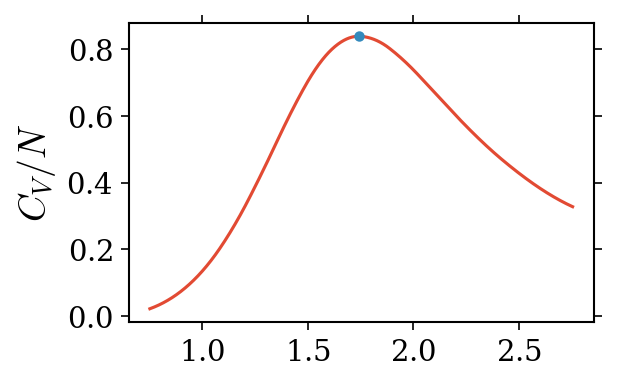

In [10]:
data_path = Path("../../data/test").resolve()
file = "p-2.0_nv-20_h-0.yml"
try:
    config_file = Path(os.path.join(data_path,file)).resolve()
    energy_file = config_file.with_suffix(".free-energy.h5")
    print(file)
    print(energy_file)

    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    with h5py.File(str(energy_file)) as h5fp:
        data_energy = h5fp["/free-energy"][()]

    temp = config_data["system"]["temperature"]
    mag_field = config_data["system"]["magnetic_field"]
    free_erg = data_energy[:, :]
        
    # Zero magnetic field spline
    free_erg_spl_zmf = interp.UnivariateSpline(temp,
                                               free_erg[:, 0],
                                               s=0, k=4)
    temp_fine = np.linspace(temp.min(), temp.max(), 2048)

    # Second derivative of the free energy.
    free_erg_der_spl_zmf = free_erg_spl_zmf.derivative(n=2)
    cv_fine = -temp_fine * free_erg_der_spl_zmf(temp_fine)
    cv_max_idx = np.argmax(cv_fine)
    temp_cv_max, cv_max = temp_fine[cv_max_idx], cv_fine[cv_max_idx]

    print(f"C_V max.: {cv_max:.8G}")
    print(f"Temp. at C_V max.: {temp_cv_max:.8G}")

    use_tex = False

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    # Specific heat subplot.
    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    ax.plot(temp_fine, cv_fine, lw=1.5)
    ax.plot(temp_cv_max, cv_max, marker="o", lw=0)

    # ax.set_xlabel(r"$k_\mathrm{B} T / J$")
    ax.set_ylabel(r"$C_V / N$")

    pyplot.draw()
    pyplot.show()

except KeyError:
    print('error with this file {}'.format(file))


p-2.0_nv-30_h-0_sample-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\infinite-size\centrosym\p_2.0\p-2.0_nv-30_h-0_sample-8.free-energy.h5
temp: [1.7        1.71428571 1.72857143 1.74285714 1.75714286 1.77142857
 1.78571429 1.8       ]
free_erg: [-1.69108476 -1.69479813 -1.69861666 -1.70253993 -1.70656742 -1.71069845
 -1.71493224 -1.71926789]
C_V max.: 0.89205578
Temp. at C_V max.: 1.7701514


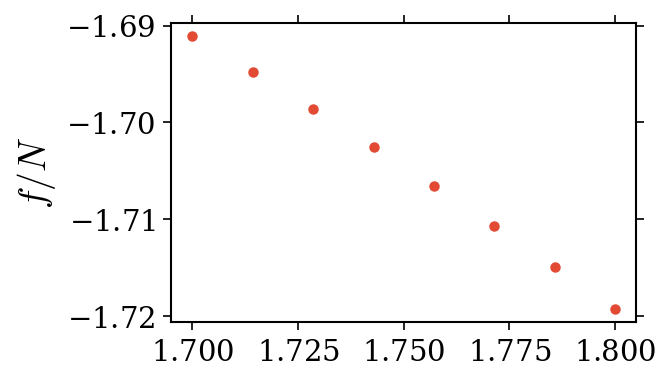

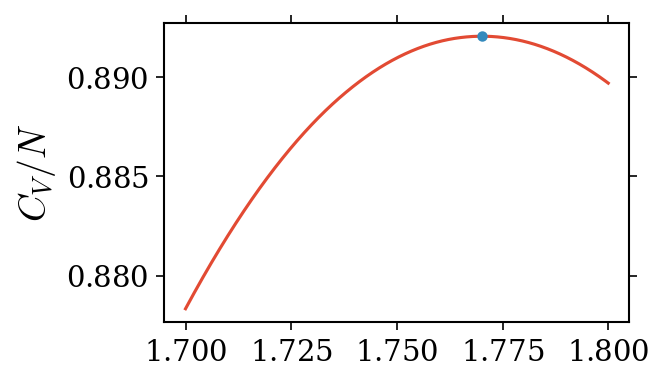

In [9]:
data_path = Path("../../data/regular/infinite-size/centrosym/p_2.0").resolve()
file = "p-2.0_nv-30_h-0_sample-8.yml"
try:
    config_file = Path(os.path.join(data_path,file)).resolve()
    energy_file = config_file.with_suffix(".free-energy.h5")
    print(file)
    print(energy_file)

    with config_file.open() as cfp:
        config_info = yaml.load(cfp)
    config_data = read_ising_config(config_info)

    with h5py.File(str(energy_file)) as h5fp:
        data_energy = h5fp["/free-energy"][()]

    temp = config_data["system"]["temperature"]
    mag_field = config_data["system"]["magnetic_field"]
    free_erg = data_energy[:, :]
        
    print('temp: {}'.format(temp))
    print('free_erg: {}'.format(free_erg[:,0]))
    # Zero magnetic field spline
    free_erg_spl_zmf = interp.UnivariateSpline(temp,
                                               free_erg[:, 0],
                                               s=0, k=4)
    temp_fine = np.linspace(temp.min(), temp.max(), 2048)

    # Second derivative of the free energy.
    free_erg_der_spl_zmf = free_erg_spl_zmf.derivative(n=2)
    cv_fine = -temp_fine * free_erg_der_spl_zmf(temp_fine)
    cv_max_idx = np.argmax(cv_fine)
    temp_cv_max, cv_max = temp_fine[cv_max_idx], cv_fine[cv_max_idx]

    print(f"C_V max.: {cv_max:.8G}")
    print(f"Temp. at C_V max.: {temp_cv_max:.8G}")

    use_tex = False

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = use_tex
    
    # free energy
    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    ax.plot(temp,free_erg[:, 0], marker="o", lw=0)

    # ax.set_xlabel(r"$k_\mathrm{B} T / J$")
    ax.set_ylabel(r"$f / N$")

    pyplot.draw()
    pyplot.show()

    # specific heat
    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    # Specific heat subplot.
    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    ax.plot(temp_fine, cv_fine, lw=1.5)
    ax.plot(temp_cv_max, cv_max, marker="o", lw=0)

    # ax.set_xlabel(r"$k_\mathrm{B} T / J$")
    ax.set_ylabel(r"$C_V / N$")

    pyplot.draw()
    pyplot.show()

except KeyError:
    print('error with this file {}'.format(file))
